**Environment Setup and Data Loading and Exploration**

In [ ]:
# Importing relevant modules.
import random
import numpy as np
import matplotlib.pyplot as plt
# official COCO dataset Python API
from pycocotools.coco import COCO
# for reading and writing images
import skimage.io as io

%matplotlib inline

In [ ]:
# # Import and mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")
# # Unzip the dataset file and store it in a folder called images.
# !unzip "/content/drive/MyDrive/Colab Notebooks/coco2017/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks/coco2017/"

Mounted at /content/drive


In [ ]:
# Definining location of training data.
train_data_path = "/content/drive/MyDrive/Colab Notebooks/coco2017/train-300"
train_annotation_file = f"{train_data_path}/labels.json"

In [ ]:
# Definining location of validation data.
validation_data_path = "/content/drive/MyDrive/Colab Notebooks/coco2017/validation-300"
validation_annotation_file = f"{validation_data_path}/labels.json"
coco_validation = COCO(validation_annotation_file)

loading annotations into memory...
Done (t=2.59s)
creating index...
index created!


In [ ]:
# Initialising COCO API for instance annotations.
coco = COCO(train_annotation_file)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


**Dataset Analysis**

In [ ]:
# Extract and display COCO categories and supercategories for the training dataset.
category_IDs = coco.getCatIds()
categories = coco.loadCats(category_IDs)

print(categories)

names_cats = [cats["name"] for cats in categories]
print(len(names_cats), "COCO categories:", " ".join(names_cats))

names_scats = set([cats["supercategory"] for cats in categories])
print(len(names_scats), "COCO supercategories:", " ".join(names_scats))

[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}, {'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}, {'id': 2, 'name': 'banana', 'supercategory': 'food'}, {'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}, {'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}, {'id': 5, 'name': 'bear', 'supercategory': 'animal'}, {'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}, {'id': 8, 'name': 'bird', 'supercategory': 'animal'}, {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}, {'id': 10, 'name': 'book', 'supercategory': 'indoor'}, {'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}, {'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}, {'id': 13, 'name': 'broccoli', 'supercategory': 'food'}, {'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}, {'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 17, 'name': 'carrot', 'sup

In [ ]:
# Define function to extract category name from ID.
def get_category_name(class_ID, categories):
    for i in range(len(categories)):
        if categories[i]["id"] == class_ID:
            return categories[i]["name"]
    return "None"

In [ ]:
# examples of categories
category_name_41 = get_category_name(41, categories)
print(f"The category name is {category_name_41}.")
category_name_15 = get_category_name(15, categories)
print(f"The category name is {category_name_15}.")

The category name is person.
The category name is cake.


**Filtering and Displaying Example Images**

In [ ]:
# Get all training images containing a given object category or categories.
filter_class = ["cat"]
category_IDs = coco.getCatIds(catNms=filter_class)
image_IDs = coco.getImgIds(catIds=category_IDs)

print(f"Number of images containing specified category(ies): {len(image_IDs)}.")
print(f"IDs of images containing specified category(ies): {image_IDs}.")

Number of images containing specified category(ies): 4.
IDs of images containing specified category(ies): [299, 132, 268, 294].


{'id': 299, 'file_name': '000000003935.jpg', 'height': 554, 'width': 640, 'license': None, 'coco_url': None}


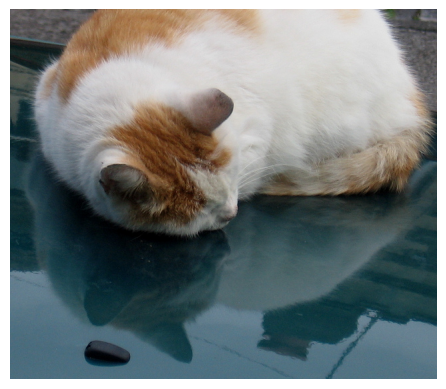

In [ ]:
# Load and display one of the example images.
example_image = coco.loadImgs(image_IDs[0])[0]
print(example_image)

image = io.imread(f'{train_data_path}/data/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

plt.show()

In [ ]:
# Get COCO annotation IDs and content of annotations, i.e., bounding boxes and segmentation masks.
test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)

test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

[3840]
[{'id': 3840, 'image_id': 299, 'category_id': 18, 'bbox': [33.36, 0.83, 602.85, 338.35], 'segmentation': [[266.0, 338.5, 225.0, 337.5, 158.0, 319.5, 156.0, 313.5, 139.0, 308.5, 121.0, 296.5, 111.0, 276.5, 66.5, 247.0, 51.5, 220.0, 47.5, 182.0, 32.5, 148.0, 44.5, 96.0, 67.0, 75.5, 72.5, 87.0, 88.5, 43.0, 139.0, 0, 554.0, 1.5, 601.5, 116.0, 635.5, 163.0, 611.5, 217.0, 589.5, 250.0, 554.0, 264.5, 466.0, 277.5, 346.0, 280.5, 335.5, 284.0, 346.0, 303.5, 331.0, 309.5, 316.0, 324.5, 287.0, 328.5, 266.0, 338.5]], 'area': 203974.29750000002, 'iscrowd': 0, 'supercategory': 'animal'}]


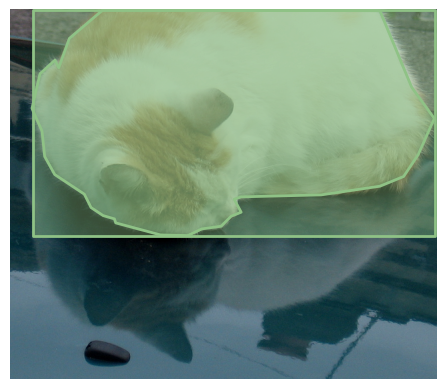

In [ ]:
# Load and display test image with instance annotations.
plt.imshow(image)
plt.axis("off")

coco.showAnns(test_image_annotations, draw_bbox=True)

In [ ]:
# Extract the training images that contain any combination of the four target classes.
target_classes = ["cake", "car", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
print("Target class IDs:", target_classes_IDs)
training_images = []

# Iterate over each individual class in the list.
for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    training_images += coco.loadImgs(training_images_IDs)

print(
    f"Number of images with target classes including repetitions: {len(training_images)}."
)

Target class IDs: [15, 16, 25, 41]
cake
car
dog
person
Number of images with target classes including repetitions: 566.


In [ ]:
# Filter out repeated images.
unique_training_images = []

for i in range(len(training_images)):
    if training_images[i] not in unique_training_images:
        unique_training_images.append(training_images[i])

# Shuffle the training data.
random.seed(0)
random.shuffle(unique_training_images)

print(
    f"Number of unique images in training data containing the target classes: {len(unique_training_images)}"
)

Number of unique images in training data containing the target classes: 300


{'id': 101, 'file_name': '000000007201.jpg', 'height': 427, 'width': 640, 'license': None, 'coco_url': None}


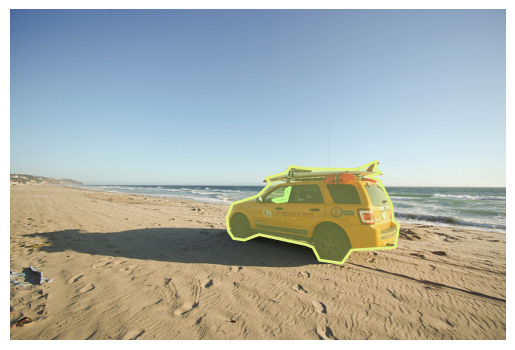

In [ ]:
# Load and display example training image with segmentation masks.
training_image = unique_training_images[10]
print(training_image)

image = io.imread(f'{train_data_path}/data/{training_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

training_image_annotations_ID = coco.getAnnIds(
    imgIds=training_image["id"], catIds=target_classes_IDs, iscrowd=None
)
training_image_annotations = coco.loadAnns(training_image_annotations_ID)
coco.showAnns(training_image_annotations, draw_bbox=False)

plt.show()

In [ ]:
# Generating and Plotting Segmentation Masks
mask_example = coco.annToMask(training_image_annotations[0])

print(type(mask_example))
print(mask_example)
print(mask_example.shape)
print(np.max(mask_example))
print(np.min(mask_example))

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(427, 640)
1
0


Unique pixel values in the mask: [0. 3.]


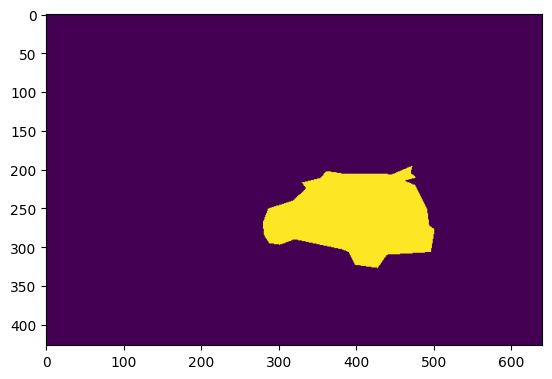

In [ ]:
# Plotting the segmentation masks with different colours.
mask = np.zeros((training_image["height"], training_image["width"]))

for i in range(len(training_image_annotations)):
    # Get object category name.
    object_category = get_category_name(
        training_image_annotations[i]["category_id"], categories
    )
    # Assign pixel value based on location in target_classes list.
    pixel_value = target_classes.index(object_category) + 1
    # Assign pixel value to mask based on annToMask output.
    mask = np.maximum(coco.annToMask(training_image_annotations[i]) * 3, mask)

print(f"Unique pixel values in the mask: {np.unique(mask)}")

plt.imshow(mask)
plt.show()

In [ ]:
# How many images are in our training/validation/test datasets?
# How many images are in the downloaded data folders?
import os

def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))])

train_image_count = count_images_in_folder("/content/drive/MyDrive/Colab Notebooks/coco2017/train-300/data")
val_image_count = count_images_in_folder("/content/drive/MyDrive/Colab Notebooks/coco2017/validation-300/data")
test_image_count = count_images_in_folder("/content/drive/MyDrive/Colab Notebooks/coco2017/test-30")

print(f"Train Images: {train_image_count}")
print(f"Validation Images: {val_image_count}")
print(f"Test Images: {test_image_count}")
print(f"Total Images in downloaded data folders: {train_image_count + val_image_count + test_image_count}")

Train Images: 300
Validation Images: 300
Test Images: 30
Total Images in downloaded data folders: 630


**Data Statistics and Visualization**

Instances of each target class in train-300:
Class ID 15: 13 instances
Class ID 16: 1061 instances
Class ID 25: 14 instances
Class ID 41: 1350 instances


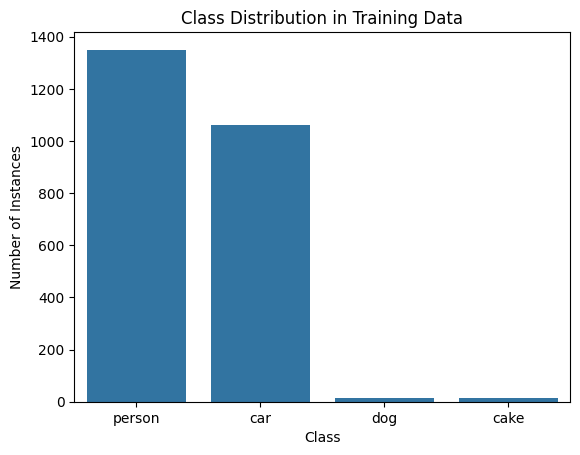

In [ ]:
# Load annotations
import json
with open("/content/drive/MyDrive/Colab Notebooks/coco2017/train-300/labels.json") as f:
    coco_json = json.load(f)

# Count category occurrences
from collections import Counter
target_ids = [15, 16, 25, 41]
counter = Counter()

for ann in coco_json["annotations"]:
    if ann["category_id"] in target_ids:
        counter[ann["category_id"]] += 1

print("Instances of each target class in train-300:")
for cid in target_ids:
    print(f"Class ID {cid}: {counter[cid]} instances")

anns = coco.loadAnns(coco.getAnnIds(catIds=target_classes_IDs))

from collections import Counter
label_names = [coco.loadCats(ann["category_id"])[0]["name"] for ann in anns]
label_counts = Counter(label_names)

import seaborn as sns
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Class Distribution in Training Data")
plt.ylabel("Number of Instances")
plt.xlabel("Class")
plt.show()

In [ ]:
# How often does each COCO/target class appear?
from collections import defaultdict

# Define your target classes
target_classes = ["cake", "car", "dog", "person"]

# Get COCO category IDs for those target classes
target_category_ids = coco.getCatIds(catNms=target_classes)

# Create a mapping from category ID to name
category_id_to_name = {cat["id"]: cat["name"] for cat in coco.loadCats(target_category_ids)}

# Count instances
target_category_counts = defaultdict(int)

for ann in coco.dataset["annotations"]:
    cat_id = ann["category_id"]
    if cat_id in target_category_ids:
        target_category_counts[category_id_to_name[cat_id]] += 1

# Print result
print("Target class frequencies in train-300:")
for category in target_classes:
    print(f"{category}: {target_category_counts[category]}")

Target class frequencies in train-300:
cake: 13
car: 1061
dog: 14
person: 1350



--- Image Size Distribution (Train & Val) ---
Total images analyzed for size: 600
Min Width: 299, Max Width: 640, Avg Width: 593.62
Min Height: 246, Max Height: 640, Avg Height: 479.12


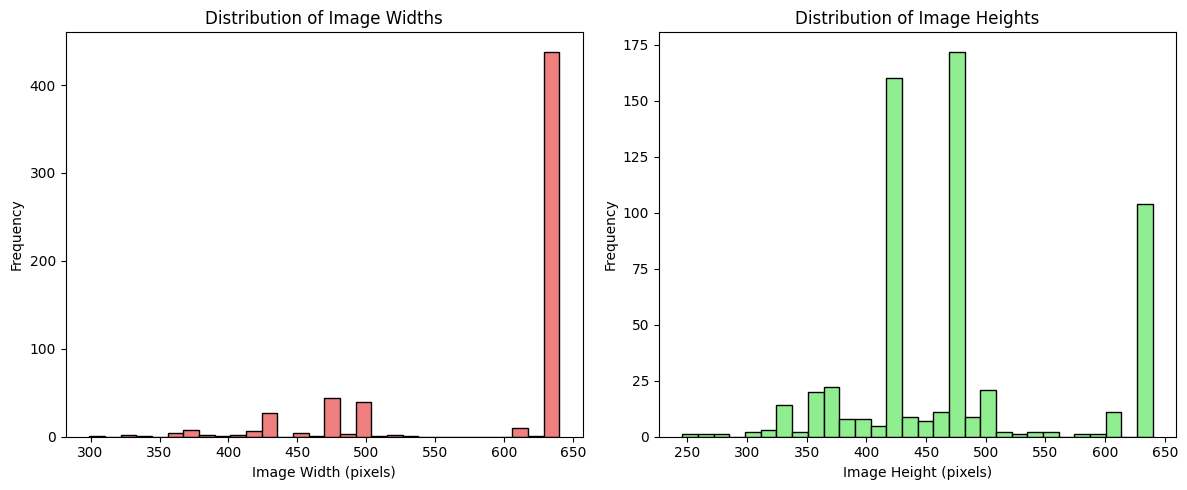

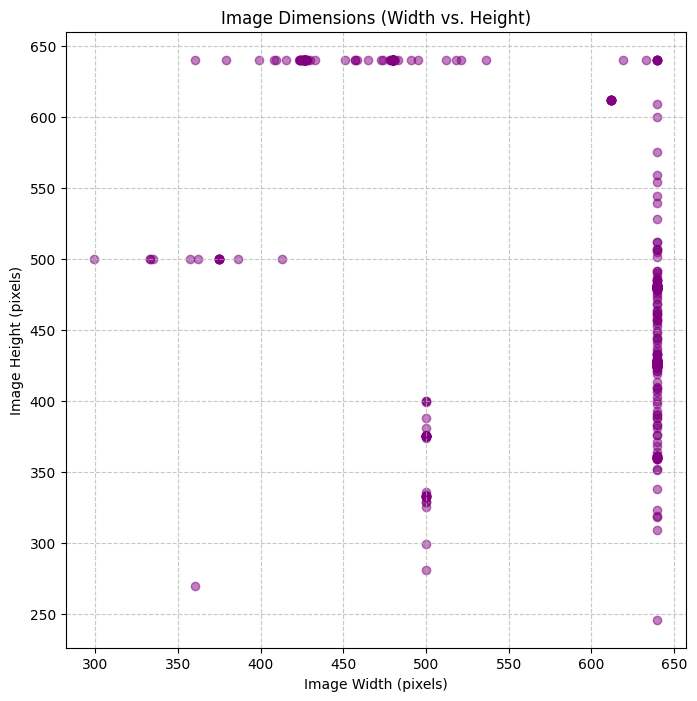

In [ ]:
# How large are the images? What is their distribution?
# Function to collect image sizes
def collect_image_sizes(coco_obj):
    img_ids = coco_obj.getImgIds()
    images_info = coco_obj.loadImgs(img_ids)

    widths = []
    heights = []
    for img_info in images_info:
        widths.append(img_info['width'])
        heights.append(img_info['height'])
    return widths, heights

# Collect sizes for training and validation
train_widths, train_heights = collect_image_sizes(coco)
val_widths, val_heights = collect_image_sizes(coco_validation)

all_widths = train_widths + val_widths
all_heights = train_heights + val_heights

print(f"\n--- Image Size Distribution (Train & Val) ---")
print(f"Total images analyzed for size: {len(all_widths)}")
print(f"Min Width: {min(all_widths)}, Max Width: {max(all_widths)}, Avg Width: {np.mean(all_widths):.2f}")
print(f"Min Height: {min(all_heights)}, Max Height: {max(all_heights)}, Avg Height: {np.mean(all_heights):.2f}")

# Plotting histograms for width and height
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(all_widths, bins=30, color='lightcoral', edgecolor='black')
plt.xlabel("Image Width (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")

plt.subplot(1, 2, 2)
plt.hist(all_heights, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel("Image Height (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Heights")

plt.tight_layout()
plt.show()

# Plotting scatter plot for width vs height
plt.figure(figsize=(8, 8))
plt.scatter(all_widths, all_heights, alpha=0.5, color='purple')
plt.xlabel("Image Width (pixels)")
plt.ylabel("Image Height (pixels)")
plt.title("Image Dimensions (Width vs. Height)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# How many segmentation ground truths are given? How are these encoded?
annotations = coco.dataset["annotations"]
total_segmentations = len(annotations)
print(f"Total segmentation ground truths: {total_segmentations}")

# Check format of segmentation
example_seg = annotations[0]["segmentation"]

if isinstance(example_seg, list):
    print("Segmentation is encoded as polygons (list of coordinates).")
elif isinstance(example_seg, dict) and "counts" in example_seg:
    print("Segmentation is RLE encoded (Run Length Encoding).")
else:
    print("Unknown segmentation format.")

# Show some example segmentations
for i in range(3):
    print(f"\nAnnotation ID: {annotations[i]['id']}")
    print(f"Segmentation: {annotations[i]['segmentation']}")

Total segmentation ground truths: 3870
Segmentation is encoded as polygons (list of coordinates).

Annotation ID: 1
Segmentation: [[392.0, 335.5, 388.0, 323.5, 393.0, 323.5, 392.5, 328.0, 395.5, 330.0, 395.5, 334.0, 392.0, 335.5]]

Annotation ID: 2
Segmentation: [[344.0, 328.5, 340.5, 327.0, 338.5, 320.0, 342.0, 315.5, 345.5, 317.0, 344.0, 328.5]]

Annotation ID: 3
Segmentation: [[336.0, 328.5, 332.5, 321.0, 334.0, 314.5, 337.5, 315.0, 336.0, 328.5]]


In [ ]:
import torch
import torchvision
import torchaudio

print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("Torchaudio version:", torchaudio.__version__)

# Checking CUDA version compatibility
print("CUDA available:", torch.cuda.is_available())
print("Torch CUDA version:", torch.version.cuda)

Torch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
Torchaudio version: 2.6.0+cu124
CUDA available: False
Torch CUDA version: 12.4


**Dataset Preprocessing**

In [ ]:
# filter dataset (only 4 classes)
def filter_coco_by_classes(json_file, classes_to_keep):
    with open(json_file) as f:
        data = json.load(f)

    class_name_to_id = {cat["name"]: cat["id"] for cat in data["categories"]}
    keep_ids = set(class_name_to_id[name] for name in classes_to_keep)

    filtered_anns = [a for a in data["annotations"] if a["category_id"] in keep_ids]
    image_ids = set([a["image_id"] for a in filtered_anns])
    filtered_imgs = [i for i in data["images"] if i["id"] in image_ids]
    filtered_cats = [c for c in data["categories"] if c["id"] in keep_ids]

    filtered = {
        "images": filtered_imgs,
        "annotations": filtered_anns,
        "categories": filtered_cats
    }
    return filtered

input_path = f"/content/drive/MyDrive/Colab Notebooks/coco2017/train-300/labels.json"
output_path = f"/content/drive/MyDrive/Colab Notebooks/coco2017/filtered_labels_train.json"

filtered = filter_coco_by_classes(input_path, target_classes)
with open(output_path, "w") as f:
    json.dump(filtered, f)

input_path2 = f"/content/drive/MyDrive/Colab Notebooks/coco2017/validation-300/labels.json"
output_path2 = f"/content/drive/MyDrive/Colab Notebooks/coco2017/filtered_labels_validation.json"

filtered2 = filter_coco_by_classes(input_path2, target_classes)
with open(output_path2, "w") as f:
    json.dump(filtered2, f)

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install pycocotools opencv-python matplotlib seaborn albumentations

import torch, torchvision
import numpy as np
import os, json, random
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bmfpt051
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bmfpt051
  Resolved https://github.com/facebookresearch/detectron2.git to commit 3a161f234e12a56eb9f31fbdbd1972cc2280bed7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.8 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6052863 sha256=cb8fed16db27a7971b0fe2d6348799107fba9b19f2ea5dbbb99148aa877b87d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-gznvmls1/wheels/17/d9/40/60db98e485aa9455

**Model Training**

In [ ]:
# model training using Detectron2
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.logger import setup_logger
setup_logger()

# Register dataset
register_coco_instances("coco_train2", {}, "/content/drive/MyDrive/Colab Notebooks/coco2017/filtered_labels_train.json", "/content/drive/MyDrive/Colab Notebooks/coco2017/train-300/data")
register_coco_instances("coco_val2", {}, "/content/drive/MyDrive/Colab Notebooks/coco2017/filtered_labels_validation.json", "/content/drive/MyDrive/Colab Notebooks/coco2017/validation-300/data")

In [ ]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
import torch

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("coco_train2",)
cfg.DATASETS.TEST = ("coco_val2",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.OUTPUT_DIR = "/content/output"
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

if torch.cuda.is_available():
    print("CUDA available.")
    cfg.MODEL.DEVICE = "cuda"
else:
    print("CUDA not available. Training will run on CPU.")
    cfg.MODEL.DEVICE = "cpu"

from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

CUDA not available. Training will run on CPU.
[06/17 14:33:53 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_featur

model_final_f10217.pkl: 178MB [00:01, 150MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[06/17 14:33:55 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/17 14:48:49 d2.utils.events]:  eta: 11:26:22  iter: 19  total_loss: 3.19  loss_cls: 1.561  loss_box_reg: 0.8699  loss_mask: 0.6941  loss_rpn_cls: 0.02666  loss_rpn_loc: 0.05075    time: 43.6108  last_time: 42.8342  data_time: 0.0351  last_data_time: 0.0062   lr: 4.9953e-06  
[06/17 15:03:43 d2.utils.events]:  eta: 11:49:47  iter: 39  total_loss: 3.202  loss_cls: 1.502  loss_box_reg: 0.8615  loss_mask: 0.6922  loss_rpn_cls: 0.03295  loss_rpn_loc: 0.05688    time: 44.0852  last_time: 50.8786  data_time: 0.0077  last_data_time: 0.0126   lr: 9.9902e-06  
[06/17 15:18:24 d2.utils.events]:  eta: 11:30:41  iter: 59  total_loss: 3.028  loss_cls: 1.369  loss_box_reg: 0.8707  loss_mask: 0.6894  loss_rpn_cls: 0.036  loss_rpn_loc: 0.05158    time: 44.0730  last_time: 52.1467  data_time: 0.0085  last_data_time: 0.0075   lr: 1.4985e-05  
[06/17 15:33:05 d2.utils.events]:  eta: 11:16:59  iter: 79  total_loss: 2.876  loss_cls: 1.209  loss_box_reg: 0.8534  loss_mask: 0.6829  loss_rpn_cls: 0.03789  

**Evaluation and Testing**

In [ ]:
# Evaluation on Validation set
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("coco_val2", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "coco_val2")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
import random
import os
import cv2
import matplotlib.pyplot as plt

# Set weights and create predictor
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

test_images_path = "/content/drive/MyDrive/Colab Notebooks/coco2017/test-30"
test_images = [f for f in os.listdir(test_images_path) if f.endswith(".jpg") or f.endswith(".png")]

# Get metadata for dataset (this contains category names)
metadata = MetadataCatalog.get(cfg.DATASETS.TEST[0])

for img_name in random.sample(test_images, 3):
    path = os.path.join(test_images_path, img_name)
    img = cv2.imread(path)
    outputs = predictor(img)

    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.2, instance_mode=ColorMode.SEGMENTATION)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(10, 7))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.title(img_name)
    plt.axis("off")
    plt.show()